<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Desgin a python function pi_mc(N, m) with
  - Input: Two integer numbers $N$ and $m$
  - Output: An array of length $m$, where all componets are independent, and computed from ordinary monte carlo method for $\pi$ with $N$ simulations (random shots).
- For $N \in \{2^n: n = 5, \ldots, 10\}$: Run pi_mc(N, 100) and find its variance
- Plot log-log chart for $N \to RMSE(N)$ using the array above and find convergence rate
- Can you propose a deterministic approximation to $\pi$?

We use $\hat\alpha_i=4\cdot$ **I**$_{\{x_i^2+y_i^2\leq1\}}$  to estimate the value of $\pi$. Since $\hat\alpha$ is unbiased MC, let 
$$
\beta_n=\frac{1}{N}\sum_{i=1}^{N}\hat\alpha_i
$$

In [0]:
# First we will import the package we need.
# codes start here
#------------------------------
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [0]:
# We define a point class

'''
x: the x value of point

y: the y value of point

'''
#------------------------------------
class point:
  def __init__(self, x, y):
    self.x=x
    self.y=y
    self.r=np.sqrt(self.x**2+self.y**2)
    self.mc=0
    point.Color(self)
  @staticmethod
  def Color(p):
    if p.r<=1:
      p.color='r'
      p.label='In'
    else:
      p.color='b'
      p.label='Out'
#--------------------------------------

# define a function that will generate N points automatically and return its pointer

#---------------------------------------
def generate(N):
  points=[]
  for _ in range(N):
    p=point(np.random.uniform(0,1), np.random.uniform(0,1))
    points.append(p)
  return points
#---------------------------------------

#---------------------------------------
def mc_1(points):
  S=0
  for p in points:
    if p.r**2<=1:
      p.mc=4
      S=S+p.mc
    else:
      p.mac=0
      S=S+p.mc
  return S

def pi_mc(N,m=100):
  results=[]
  for _ in range(m):
    points=generate(N)
    S=mc_1(points)
    results.append(S/N)
  return results
      
      

In [0]:
N=[2**i for i in range(5,11)]
Values=[]
for n in N:
  results=pi_mc(n)
  Values.append(np.var(results))
  
  

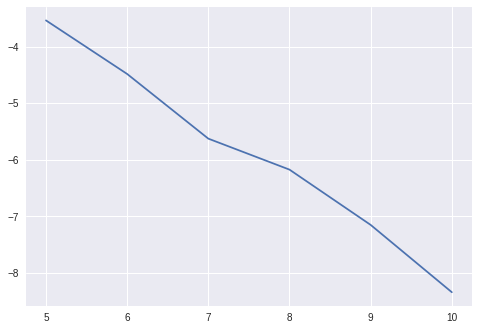

In [57]:
xx=np.log2(N)
yy=np.log2(Values)
plt.plot(xx,yy)
plt.show()

In [58]:
out = ss.linregress(xx,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 0.9302040114104828


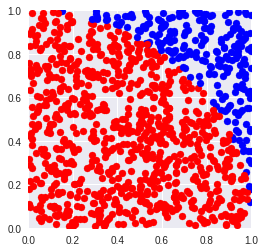

In [59]:
n=2**10
plt.figure(figsize=[4,4])
points=generate(n)
for p in points:
  plt.scatter(p.x, p.y, color=p.color, label=p.label)
  plt.xlim(0,1)
  plt.ylim(0,1)
plt.show()

 ## Can you propose a deterministic approximation to $\pi$

We will calculate the area of the quarter circle in the figure above. In order to do calculate the area, the margin of the ciecle as a function 
$$
f(x)=\sqrt{1-x^2}\text{ here } x\in[0,1] 
$$
Now, we only need to calculate the mean value of function $f(x)$. I will explain why this will work, in the following code.



## First, we will show basic figure, i.e. the area we need to calculate, which is the pink area in the figure. 

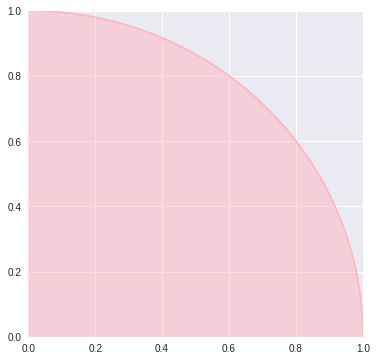

In [60]:
# code starts here
# codes here are used to expalin why my method works. Code itself is not important, but the figure contains the core algorithms.
#-------------------
X=np.linspace(0,1,2**15)
Y=np.sqrt(1-X**2)
plt.figure(figsize=[6,6])
plt.fill_between(X,Y,where=(X>0)&(X<1), facecolor='lightpink', alpha=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X,Y, color='lightpink')
plt.show()

## Now, we will take several points in above figure, and use their y-value as the estimation of the pink area.   the colorful rectangle is our estimation. Therefore, we get following figures.

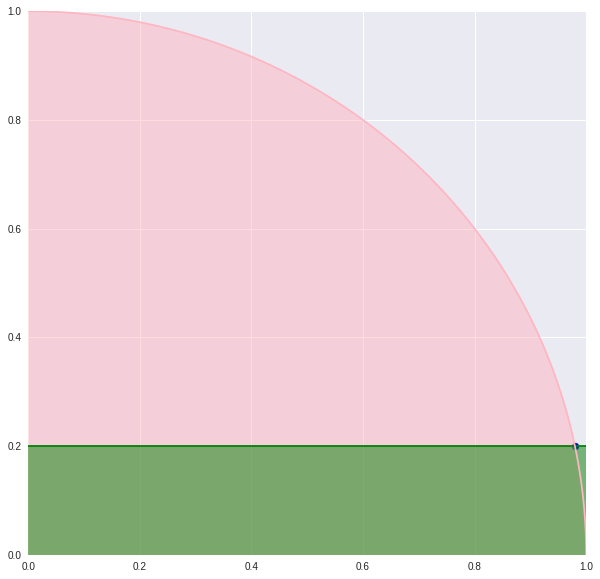

In [61]:
X=np.linspace(0,1,2**15)
Y=np.sqrt(1-X**2)
plt.figure(figsize=[10,10])
x=np.linspace(0,1,100)
y=[0.2]*100
plt.plot(x,y,color='green')
plt.scatter(np.sqrt(1-0.2**2),0.2,color='blue')
plt.fill_between(X,Y,where=(X>0)&(X<1), facecolor='lightpink', alpha=0.5)
plt.fill_between(x,y,where=(x>-1)&(x<2), facecolor='green', alpha=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X,Y, color='lightpink')
plt.show()

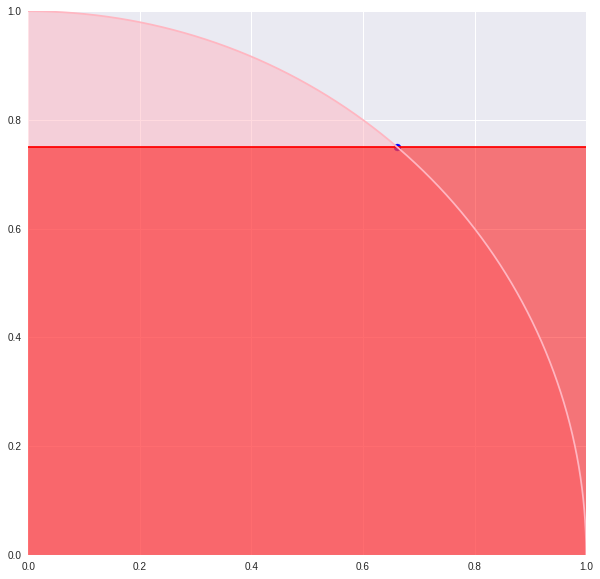

In [64]:
X=np.linspace(0,1,2**15)
Y=np.sqrt(1-X**2)
plt.figure(figsize=[10,10])
x=np.linspace(0,1,100)
y=[0.75]*100
plt.plot(x,y,color='red')
plt.scatter(np.sqrt(1-0.75**2),.75,color='blue')
plt.fill_between(X,Y,where=(X>0)&(X<1), facecolor='lightpink', alpha=0.5)
plt.fill_between(x,y,where=(x>-1)&(x<2), facecolor='red', alpha=0.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X,Y, color='lightpink')
plt.show()

## Now, we take a lot of points in this figure, and take the average of the area of the rectangle. We can get a precise approximate of area of the quarter circle. i.e. $\frac{\pi}{4}$

In [70]:
N=2**14
X=np.linspace(0,1,N)
Y=np.sqrt(1-X**2)

#-------
# estimation of area 
#-------

S=sum(Y)/N

#-------
#pi approximation
#-------

pi_approximate=4*sum(Y)/N
pi_approximate

3.1415224155357957